<a href="https://colab.research.google.com/github/krithikajain/bart_model_legal_summariser/blob/main/bart_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install nltk
!pip install rouge_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 22.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24954 sha256=02f97b55d9e53230eba00b4cd01267863f33496a0af918a91d3fe76e8b4ea516
  Stored in directory: /root/.cache/pip/wheels/9b/3d/39/09558097d3119ca0a4d462df68f22c6f3c1b345ac63a09b86e
Successfully built rouge_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
import zipfile 
with zipfile.ZipFile(r"/content/drive/MyDrive/Final Year Project /dataset.zip","r") as f:
  f.extractall(r"/content/drive/MyDrive/Final Year Project") 

KeyboardInterrupt: ignored

In [ ]:
import transformers 
from transformers import BartForConditionalGeneration, BartTokenizer, BartConfig 
import nltk 
nltk.download('punkt') 
from nltk.corpus import stopwords 
from nltk.tokenize import sent_tokenize,word_tokenize 
from nltk.stem import PorterStemmer 
import string 
from rouge_score import rouge_scorer

nltk.download('stopwords') 
stop_words = set(stopwords.words('english'))

extracted_text=' ' 
with open('/content/drive/MyDrive/legal_data/judgement/1953_L_1.txt', 'r') as file: 
      extracted_text = file.read()
      
#stemming tokens 

#function for tokenization and removing stopwords
def remove_stop_words(text):
    punct_removed_text = text.translate(str.maketrans('','',string.punctuation))
    words = nltk.word_tokenize(punct_removed_text)
    words = [word for word in words if word.lower() not in stop_words]
    return " ".join(words)


#function for stemming
def stemming(text):
    tokens = text.split(' ')

    #defining a Stemmer
    stemmer = PorterStemmer()

    #stem the tokens 
    stemmed_tokens = []


    for token in tokens:
        stemmed_token = stemmer.stem(token)
        stemmed_tokens.append(stemmed_token)

    #join the stemmed tokens back into a string
    stemmed_text = ' '.join(stemmed_tokens)

    return stemmed_text

text_without_stopwords = remove_stop_words(extracted_text) #removing stopwords (function called)
stem_text = stemming(text_without_stopwords)
sentences = sent_tokenize(extracted_text)
text = "summarize:" + stem_text


bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
    #BART MODEL ------------

reference_summary=' '
with open('/content/drive/MyDrive/legal_data/summary/full/A1/1953_L_1.txt', 'r') as file:
    reference_summary = file.read()

bart_inputs = bart_tokenizer.encode(extracted_text,return_tensors='pt', max_length=1024, truncation=True)
bart_summary_ids = bart_model.generate(bart_inputs, num_beams=1, max_length=400, early_stopping=True)
#     bart_summary = bart_tokenizer.decode(bart_summary_ids[0],skip_special_tokens=True)
bart_summary = bart_tokenizer.decode(bart_summary_ids[0],skip_special_tokens=True)
print('summary',bart_summary)

# Calculate ROUGE scores
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
scores = scorer.score(str(bart_summary), reference_summary)
print(scores)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


FileNotFoundError: ignored

The case was brought by a widow and her daughter who had married a man who owned a number of properties in the tirunelveli district. The husband of the widow had left a will to his wife and children. The widow sold one of the properties to the 2nd defendant for a sum of £500. The appeal was granted and the supreme court was granted the appeal to the supreme Court of India.

In [ ]:
import transformers 
from transformers import BartForConditionalGeneration, BartTokenizer, BartConfig 
import nltk 
nltk.download('punkt') 
from nltk.corpus import stopwords 
from nltk.tokenize import sent_tokenize,word_tokenize 
from nltk.stem import PorterStemmer 
import string 

nltk.download('stopwords') 
stop_words = set(stopwords.words('english'))
extracted_text=' ' 
with open('/content/drive/MyDrive/legal_data/judgement/2015_J_10.txt', 'r') as file: 
      extracted_text = file.read()
    
sentences = sent_tokenize(extracted_text)

reference_summary=' '
with open('/content/drive/MyDrive/legal_data/summary/segment-wise/A2/facts/2015_J_10.txt', 'r') as file:
    reference_summary = file.read()

bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

bart_inputs = bart_tokenizer.encode(extracted_text,return_tensors='pt', max_length=1024, truncation=True)
bart_summary_ids = bart_model.generate(bart_inputs, num_beams=4, max_length=400, early_stopping=True)
bart_summary = bart_tokenizer.decode(bart_summary_ids[0],skip_special_tokens=True) 
print('bart summary',bart_summary)
# print('reference summary',reference_summary)
# Calculate ROUGE scores
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
scores = scorer.score(str(bart_summary), reference_summary)
print(scores)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


bart summary This appeal is preferred against the judgment dated 19 8 2011 passed by the high court of punjab and haryana in criminal appeal no 181 sb of 2000. The high court partly allowed the appeal filed by the appellants thereby confirming the conviction of the appellant with certain modifications. The accused persons were convicted of trespassing into the land belonging to the accused and attempted to forcibly cut the pullas.
{'rouge1': Score(precision=0.09429280397022333, recall=0.5428571428571428, fmeasure=0.160676532769556), 'rouge2': Score(precision=0.03980099502487562, recall=0.2318840579710145, fmeasure=0.06794055201698514), 'rougeL': Score(precision=0.08188585607940446, recall=0.4714285714285714, fmeasure=0.13953488372093023)}


bart summary This appeal is preferred against the judgment dated 19 8 2011 passed by the high court of punjab and haryana in criminal appeal no 181 sb of 2000. The high court partly allowed the appeal filed by the appellants thereby confirming the conviction of the appellant with certain modifications. The accused persons were convicted of trespassing into the land belonging to the accused and attempted to forcibly cut the pullas.


In [ ]:
!pip install scikit-learn



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=444e9374c8e54a7afb73a21a383642bf70822ecf3a8ebdd52dcb9f2bcd8ca0e7
  Stored in directory: /root/.cache/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


In [ ]:
def split_text(text):
  words = word_tokenize(text)
  length = len(words)
  
  chunks = []
  current_chunk = words[0]
  for sentence in words[1:]:
    if len(current_chunk + " " + sentence) > (length/2):
      chunks.append(current_chunk)
      current_chunk = sentence
    
    else:
      current_chunk += " " + sentence
    
  chunks.append(current_chunk)
  return chunks

In [ ]:
import streamlit as st
import pickle

# Step 1: Load the model from the saved pickle file
with open("C:/Users/krithika/Downloads/bart_model.pkl", "rb") as f:
    model = pickle.load(f)

# Step 2: Create a file uploader using Streamlit's file_uploader widget
uploaded_file = st.file_uploader("Choose a text file", type=["txt"])

# Step 3: Generate a summary using the loaded model and uploaded file contents
if uploaded_file is not None:
    input_text = uploaded_file.read().decode("utf-8")  # read and decode file contents
    summary = model.generate(input_text)  # generate summary using BART model

    # Step 4: Display the generated summary on the Streamlit app
    st.write("Generated Summary:")
    st.write(summary)


In [ ]:
import transformers 
from transformers import BartForConditionalGeneration, BartTokenizer, BartConfig 
import nltk 
nltk.download('punkt') 
from nltk.corpus import stopwords 
from nltk.tokenize import sent_tokenize,word_tokenize 
from nltk.stem import PorterStemmer 
import string 
import pickle

nltk.download('stopwords') 
stop_words = set(stopwords.words('english'))

with open('/content/drive/MyDrive/Final Year Project/dataset/IN-Abs/test-data/judgement/1181.txt', 'r') as file: 
      extracted_text = file.read()

bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

chunks = split_text(extracted_text)

final_summary = ""
for chunk in chunks:
  bart_inputs = bart_tokenizer.encode(chunk,return_tensors='pt', max_length=1024, truncation=True)
  bart_summary_ids = bart_model.generate(bart_inputs, num_beams=4, max_length=400, early_stopping=True)
  bart_summary = bart_tokenizer.decode(bart_summary_ids[0],skip_special_tokens=True)
  final_summary += bart_summary



print("\nGenerated summary:\n", final_summary)
#print('bart summary',final_summary)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Generated summary:
 Appeal No. 101 of 1959. Appeal by special leave from the judgment and order dated November 8, 1957, of the Deputy Custodian General. Evacuee Property, Now Delhi Revision Petition No. 17 R/55 of 1955. Achhru Ram and K. L. Mehta for the appellants. B.K., Khanna and, T. M. Sen for the respondent No. 1. N.S. Bindra and A. G. Ratnaparkhi for the respondents Nos. March 15. The Judgment of the Court was delivered by MUDHOLKAR J.Acting suo motu the Additional Custodian made an order on October 31, 1952 cancelling the order of allotment of land in the village Raikot made in favour of the appellants in the year 1949. These 14 allottees preferred an application for review of the order cancelling their allotment on the ground that this cancellation was a result of misapprehension of the actual facts and that they were not entitled to allotments of suburban lands at all.Custodian and restored to the 14 allottees of Karodian the land which had been originally allotted to them. a

In [ ]:
with open("/content/drive/MyDrive/Final Year Project/bart_model.pkl", "wb") as f:
    pickle.dump(bart_model, f)

with open("/content/drive/MyDrive/Final Year Project/bart_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

bart summary Appeal No. 101 of 1959. Appeal by special leave from the judgment and order dated November 8, 1957, of the Deputy Custodian General, Evacuee Property, Now Delhi Revision Petition No. 17 R/55 of 1955. Achhru Ram and K. L. Mehta for the appellants. B.K., Khanna and, T. M. Sen, for the respondent No. 1. N.S. Bindra and A. G. Ratnaparkhi for the respondents.The Judgment of the Court was delivered by MUDHOLKAR J. The appellants who are admittedly displaced persons from West Pakistan were granted quasi permanent allotment of 24 standard acres and 15 3/4 units in the village of Raikot in Ludhiana District in 1949.Their father Sardar Nand Singh was found entitled to quasi permanent allotment of 40 standard acres and 5 1/4 units of land. He was given quasipermanent allotment in another village named Humbran in the same district. The two villages are, however, 25 miles or so distant from each other.Nand Singh, therefore, made an application for consolidation of his lands with those of the appellants in the village Raikot. This application was rejected by the Assistant Custodian on July 23, 1951 on the ground that no land was available. During the pendency of this application he died and after his death, the, application was continued.A revision petition preferred by the appellants against the order of the Assistant Custodian was dismissed on August 20, 1952. On October 7, 1952 the appellant preferred a revision application before the Custodians General. The petition was dismissed again on October 14, 1952, and the appeal was dismissed.During the pendency of the revision application the Additional Custodian for the State of Punjab cancelled the allotment of fourteen quasi permanent allottees of the village Karodian in the same district. These persons were entitled to allotments of suburban land a had been wrongly fitted in the village.Acting suo motu the Additional Custodian made an order on October 31, 1952 cancelling the order of allotment of land in the village Raikot made in favour of the appellants in the year 1949. Instead allotted to them land in Karodian in substitution of :,the lands atRaikot and of the lands allotted to their father.The land allotted was out of the land released upon the cancellation of allotment of lands in favour of the aforementioned 14 allottees. These fourteen allotteers preferred an application for review of the order cancelling their allotment on the ground that this cancellation was a result of misapprehension of the actual facts.The appellants also preferred an application for review of the order cancelling their quasi permanent allotment in the village Raikot. The appellants are seeking a review of an order canceling their quasi Permanent allotment. They also want to apply for an application to cancel their quasi-permanent allotment of land.The Additional Custodian for the State of Punjab recommended the restoration of the land to the 14 allottees. The land had been taken away from them by reason of cancellation of the allotment in their favour by the order dated October 31, 1952. The order was issued by the Supreme Court of India.The Additional Custodian admitted that these persons were not entitled to allotment of suburban land and that consequently their allotment had been wrongly made. The application made by the appellants was kept pending till the decision of the application of the 14 allottees of Karodian.The Additional Custodian, however, dismissed the application on the ground that r. 14(6) of the Evacuee Property Rules which came into force on July 22, 1952, stood in the way of cancellation of the allotment in favour of the appellant.On December 17, 1954, the Deputy Custodian General, before whom these allottees had preferred an application for revision, revised the order of the Additional Custodians. The land which had been originally allotted to them. and allotment of which had had been cancelled earlier.As a result of this order the allotment of Karodian land made in favour of the appellants automatically stood cancelled. As a result, the entire allotment was cancelled and the land was returned to the owners of the land. The decision was made by the Supreme Court of the Kingdom of Iran.On January 6, 1955, the appellants moved the Deputy Custodian General for calling up their review application and for revising the order of October 31, 1952 passed by the Additional Custodians cancelling the allotment of Raikot lands which had originally been made in their favour in the year 1949.Consequent upon the cancellation of the appellants'allotment of the Raikot land they were allotted to respondents 2 to 4. These persons were, therefore, impleaded as parties to the proceedings. By the order dated November 8, 1957 the Deputy Custodian General dismissed the appellant'application.The appellants have, therefore, come up to this Court by way of appeal with special leave. The ground on which the appellants'application was rejected by the Deputy Custodian General was that his jurisdiction to revise the order has been taken away by virtue of the provisions of, (44 of 1954) and the notification issued thereunder on March 24, 1955.In taking this view he has relied upon the decision in Bal Mukund vs The State of Punjab (1) He has relied on the decision of the Supreme Court of India in the case of Mukund v The State Of Punjab. He has taken the decision on the basis of the decision by the Court of Appeal of India.In that case the Court has held that the powers of the Custodian General to deal with matters of this kind have been taken away by the, and that these powers now vest in another authority. There is no provision for continuing the pro ceedings which had been commenced under the, but had not been concluded. Mr Achhruram for the appellants challenged the correctness of this decision.There is no specific provision in this Act to the effect that after its commencement the jurisdiction of the various authorities to deal with the allotment or cancellation of allotment of evacuee property shall cease. What is urged by Mr. Khanna on behalf of the Custodian General is that this is the effect of the provisions of sections 12(2) and 19 of the Act.Section 12 of the 1954 Act empowers the Central Government to acquire evacuee property for rehabilitation of displaced persons. It is common ground that by notification section R. 0. 0 can be used to acquire such evacuees' property, says the government. The government has published in the official gazette a notification to the effect that it has decided to acquire the property in pursuance of this provision.The Central Government decided to acquire all evacuee property allotted to displaced persons by the Custodian under the "Conditions" contained in the notification of the Government of Punjab in the Department of Rehabilitation, No. 4892 6 dated July 8, 1949, except certain categories of property specified in the schedule.The Raikot lands were allotted to the appellants under the aforesaid notification of the Government of Punjab. It is not disputed on their behalf that they do not fall within any of the excepted categories of property, set out in the schedule. Sub section 2 of section 12 of the Act (1) I.L.R. 1957 Punj.333 provides that on the publication of the notification under sub section 1 the right, title or interest of any evacuee in the property specified in the notification shall immediately stand extinguished and that property shall vest absolutely in the Central Government free from all encumbrances. The notification was published on August 1, 2013.The power of the Custodian under the, to allot any property to a person or to cancel an allotment existing in favour of a person rests on the fact that the property vests in him. The power to cancel a property is the same as the power to allot a person a property.But the consequence of the publication of the notification by the Central Government under section 12(1) of the with respect to any property or a class of property would be to divest the Custodian completely of his right in the property flowing from section 8 of the, and vest that property in the Central government.He would, therefore, not be competent to deal with the property in any manner in the absence of any provision in either of these two enactments permitting him to do so. No provision was, however, pointed out to us in either. of these Acts whereunder despite the Vesting of the property. in the Central Government the Custodian was empowered todeal with it.Sub section 4 of section 12 of the 1954 Act provides that all evacuee property acquired under that section shall form part of the compensation pool. Under section 16(1) of this Act the Central Government is empowered to take such measures as it considers necessary or expedient for the custody, management and disposal of the Compensation Pool.Sub section 2 of section 16 empowers the Central Government to appoint such officers as it deems fit. The Central Government can constitute such authority or corporation as it deem fit for the purpose of managing and disposing of the properties forming part of the compensation pool. It can appoint such officials as it sees fit.Section 19 of the Act provides that notwithstanding anything contained in any contract or any other law for the time being in force but subject to the rules that may be made under the Act the managing officer or managing corporation may cancel any allotment etc., under which any evacuee property is held or occupied.This provision thus confers the power to deal with evacuee property acquired under the Act only on a managing officer appointed or managing corporation constituted under the act. The Act makes no mention whatsoever of the Custodian appointed under the. The Act was passed in 2008 and came into force in 2009.No doubt, under section 10 of the the Custodian is empowered to manage evacuee property. In exercise of his power he will be competent to allot such property to any person or to cancel an allotment or lease made in favour of a person. No doubt.Apart from the fact that subsequent to the issue of the notification under section 12(1) of the, the property would cease to be evacuee property, the powers of the Custodian would be in conflict with those conferred by section 19 of the 1954 Act.The powers conferred by sub section(1) of section 19 of the 1954 Act are to prevail notwithstanding anything contained in any other law for the time being in force. Therefore, they must prevail over the provisions of B. 10 of the 1950 Act. In other words, to that extent the. provisions of section 10 and section 19 cannot stand together.It is true that there, is nothing on record to show that a managing officer was appointed with respect to the Raikot properties acquired under the notification dated March 24, 1955. The point is, who, after the coming into force of the 1954 Act could cancel an allotment.Section 10 says that only a managing officer or a managing corporation can cancel an allotment. This means that no one else can do so even though some other law may have authorised another person or authority to cancel it. Mr. Achhruram contended that the appellants'rights were protected by section 10 of the.Section 10 runs as follows: 335 "Special procedure for payment of compensation in certain cases" The property has been leased or allotted to a displaced person by the Custodian under the conditions published (a)by the notification of the Government of Punjabi in the Department of Rehabilitation No. 1.4892 S or 4892 S dated the 8th July, 1949, or (b)by the notification of the Government of Patiala and East Punjab States Union in the Department of Rehabilitation No. 4892 S and 4891 S. The case was referred to the Supreme Court of India.8R or 9R, dated the 23rd July, 1949, and published in the official Gazette of that State dated the 7th August, 1949. If such property is acquired under the provisions of this Act and forms part of the compensation pool, the displaced person shall continue in possession of such property on the same conditions on which he held the property immediately before the date of the acquisition.It is followed by an explanation; but that explanation has no bearing upon the point urged by Mr. Achhruram. It is no doubt true that the Raikot lands were allotted to the appellants under the notification referred to in el. El. The appeal is dismissed.It is implicit in this section that the displaced person to whom land was allotted "held" the land and was in possession of such property at the date of the notification.(a) of this section and, therefore, they would be entitled to the benefits conferred by this section.It is not disputed that the appellants ceased to hold and had lost possession of the Raikot lands before the publication of this notification. Even assuming that the order of the Custodian cancelling the allotment in their favour was erroneous there will be no difference in the result.336 Mr. Achhruram then referred to the "Conditions" on which allotments of land may be made under the notification. He pointed out that under condition No. 6 the Custodian or rehabilitation authority would be competent to resume or cancel an allotment only on one of the grounds set out in that condition.He said that the cancellation of the allotment was impermissible inasmuch as it was not based upon any of the grounds set out in the 6th condition. We would repeat that the appellants had lost their possession before the publication of the notification and are thus not entitled to the protection of the section.Moreover, the Custodian, by reason of the divesting of the property, as from March 24, 1955, had become functus officio with respect to it. He could not rectify any error made by him in the past in the matter of cancellation of allotment.It is true that had the appellants been in possession at the critical time they would have had the right to obtain a permanent transfer in their favour of the Raikot lands. By virtue of what happened and without any fault on their part they have been deprived 'of that right.That is indeed unfortunate but none of the authorities created by the could rectify the wrong that has been done by them to the appellant. The question whether it could be rectified was not canvassed before us and, therefore, there is no occasion for us to say anything about it.Mr. Achhruram contended that r. 74 of the Displaced Persons (Compensation and Rehabilitation) Rules, 1955 stood in the way of the Custodian allotting the Raikot property to the respondents. That rule reads as follows: "Allotments which are the subject matter of dispute"No property in a rural area in respect of which. any case is pending in a Civil Court or before a Deputy Custodian, Custodians or Custod. General, shall be transferred to the allottee. No property in. respect of a civil case pending in the rural area or before. a deputy or custodian general. No. property in which any case. is pending in a rural. area or before a deputy or general.337 The aforesaid rule is in Chapter X headed "Payment of compensation under section 10 of the Act" and deals with a transfer of property to an allottee by way of final settlement of his claim to compensation. It does not deal with the question of allotment on a quasi permanent basis.Moreover, this rule applies to a proceeding before an authority created by the and not to an authoritycreated by the. There is, therefore, no substance in this argument. There is also no substance to the argument that the Supreme Court should not be able to rule on this issue.Mr. Achhruram referred to section 17 of the 1954 Act and to r. 102 of the Rules framed thereunder. He said that the powers of the managing officers appointed under the Act are confined only to properties which are entrusted to them for management. Section 17 deals with the function; and duties of managing officers and managing corporation.Sub section(1) provides that managing officers and managing corporations will perform such functions as may be assigned to them under the Act. Sub section(2) states that the Act provides for the appointment of managing officers to carry out certain functions. The Act also provides for a number of other functions to be performed by managing officers.Sub section(2) provides that subject to the provisions of the Act and the rules made thereunder, a managing officer or a managing corporation may take such measures as he or it considers it necessary or expedient for the purpose of securing, administering, preserving, managing or disposing of any property in the compensation pool entrusted to him or it. etc.The argument is that unless there is such "entrustment" the managing officer or managing corporation has no function to perform with respect to evacuee property. His contention appears to be that there is nothing to show that this property was "entrusted" to a managing officer.In the first place the section confers the particular powers On managing officers or managing corporations only and no one else. Therefore, even if no managing officer or managing corporation was appointed with respect to that property. No one else could exercise the power of cancellation of allotment.There is no ground in the special leave petition or the statement of the 43 338 case that there is no entrustment in fact of this property or this class of properties to a managing officer or managing corporation. He cannot, therefore, be permitted to make out a new case at this stage of argument.This argument assumes that the property, despite the publication of the notification under section 12(1) of the Act continues to be evacuee property. That apart, this argument assumes the property is still evacuees' property, even after the notification has been published.Section 19(1) of the Act does not refer to entrustment at all and it is this provision which must prevail over the general provision. This provision is a general provision and the particular provision regarding cancellation of allotment is section 19(2) of Act.He then contends that the provisions of section 19(1) of the Act being subject to rules made under the Act must be read along with r. 102 which deals with cancellation of allotments of leases. He then argues that the rules are not subject to review by the High Court.That rule reads thus: "Cancellation of allotments and leases" A managing officer or a managing corporation may sell any property in the compensation pool entrusted to him or to it. It can cancel an allotment or terminate a lease, or vary the terms of any such lease or allotment.He points out that in the first place, the rule speaks of land 'entrusted'to the manager and, therefore would operate only if entrustment is established. What we have said in regard to section 17 would apply here also, he says. He adds that the same rules would apply in relation to the stadium.He then says that this rule restricts the powers of a managing officer or a managing corporation in the matter of cancellation of allotment in the sense that it permits cancellation only on certain specified grounds. Therefore, it cannot be said that section 19(1) of the Act is completely in conflict with section 10 of the in so far as the question of cancelling allotment is concerned.We cannot accept the argument because, apart from the fact that the acquired properties have ceased to be evacuee properties, el. (d) of r. 102 permits the managing officer or managing corporation to cancel allotment "for any other sufficient reason to be recorded in writing"In our opinion, therefore, this rule does not help the appellants. Mr. Khanna had raised three other points but upon the view which we have taken as to the effect of sections 12 and 19 of the Act, it is not necessary to consider them. The appeal is accordingly dismissed.We, however, make no order as to costs because had there been no delay on the part of the Custodian General in dealing with the revision application the present situation would not have arisen, the court said. Appeal dismissed. The case was heard at the High Court in London.


In [ ]:
import transformers
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig

# Step 1: Accept a text file
text_file = input("Enter the path of the text file: ")

# Step 2: Load and preprocess the text data
with open(text_file, "r") as f:
    text = f.read()

# Step 3: Train a BART model on the text data
tokenizer = BartTokenizer.from_pretrained("facebook/bart-base")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-base")

inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=1024)
summary_ids = model.generate(inputs['input_ids'], num_beams=1, max_length=400, early_stopping=True)
summary = tokenizer.decode(summary_ids.squeeze(), skip_special_tokens=True)


with open("bart_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("bart_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

print("\nGenerated summary:\n", summary)


Enter the path of the text file: /content/drive/MyDrive/legal_data/judgement/1953_L_1.txt

Generated summary:
 one lakshminarayana iyer a hindu brahmin who owned considerable properties in the tirunelveli district died on 13th december 1924 leaving him surviving a widow ranganayaki and a married daughter ramalakshmi. The widow was a widow of the husband of the widow.ramalakshe was a daughter of the wife of the deceasedramalakhshmi had married the plaintiff and had a number of children from him.they were all alive in december 2004 when lakShminaraya died.the widow of a hindi brahman was a hidar.before his death he executed a will on 16th november 1924 the construction of which is in controversy in this appeal.the court of the subordinate judge held that the plaintiff was entitled to maintain the suit.by this will he gave the following directions after my lifetime you the aforesaid ranganayaaki amminal my wife shall till your lifetime enjoy the afore said entire properties the outstandin

 one lakshminarayana iyer a hindu brahmin who owned considerable properties in the tirunelveli district died on 13th december 1924 leaving him surviving a widow ranganayaki and a married daughter ramalakshmi. The widow was a widow of the husband of the widow.ramalakshe was a daughter of the wife of the deceasedramalakhshmi had married the plaintiff and had a number of children from him.they were all alive in december 2004 when lakShminaraya died.the widow of a hindi brahman was a hidar.before his death he executed a will on 16th november 1924 the construction of which is in controversy in this appeal.the court of the subordinate judge held that the plaintiff was entitled to maintain the suit.by this will he gave the following directions after my lifetime you the aforesaid ranganayaaki amminal my wife shall till your lifetime enjoy the afore said entire properties the outstandings due to me the debts payable by me and the chit amounts payable by you.after your lifetime ramalakhmamamammy wife of my late son rama ayyar avergal of melagaram village and her heirs shall enjoy them with absolute rights and powers of alienation such as gift exchange and sale from son to grandson and so on for generations.the judge held the followingas regards the payment of maintenance to be made to chinnanmal alias lakšmi ammal wife of our late son hariharamayyan my wife ranganahmammy daughter and wife of ramaayyar.the lord of the court of appeals was not able to make a decision on the matter.the jury was not allowed to make any decision on whether to grant the same as she pleases and obtain a release deed.the trial was not held.ranganayaka entered into possession of the


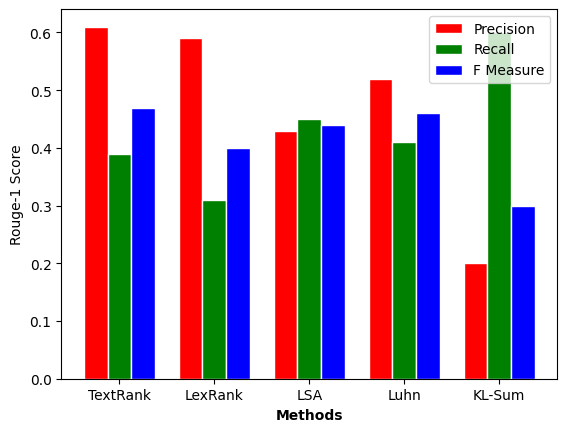

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
methods = ['TextRank', 'LexRank', 'LSA', 'Luhn', 'KL-Sum']
precision = [0.61, 0.59, 0.43, 0.52, 0.20]
recall = [0.39, 0.31, 0.45, 0.41, 0.60]
f_measure = [0.47, 0.40, 0.44, 0.46, 0.30]

# Set the width of the bars
bar_width = 0.25

# Set the position of the bars on the x-axis
r1 = np.arange(len(precision))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar chart
plt.bar(r1, precision, color='red', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r2, recall, color='green', width=bar_width, edgecolor='white', label='Recall')
plt.bar(r3, f_measure, color='blue', width=bar_width, edgecolor='white', label='F Measure')

# Add xticks on the middle of the group bars
plt.xlabel('Methods', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(precision))], methods)

# Add y-label
plt.ylabel('Rouge-1 Score')

# Add a legend
plt.legend()

# Show the plot
plt.show()

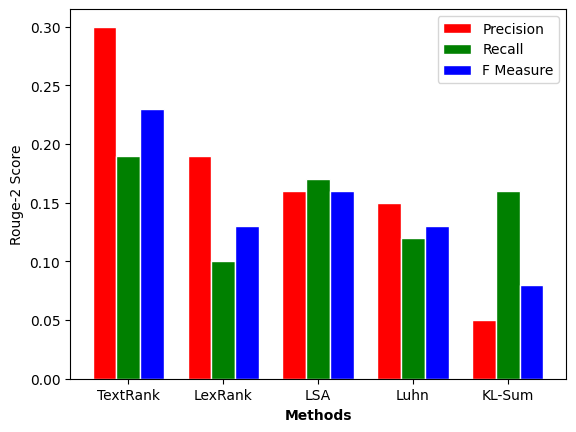

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
methods = ['TextRank', 'LexRank', 'LSA', 'Luhn', 'KL-Sum']
precision = [0.30,
0.19,
0.16,
0.15,
0.05
]
recall = [0.19,
0.10,
0.17,
0.12,
0.16
]
f_measure = [0.23,
0.13,
0.16,
0.13,
0.08,
]

# Set the width of the bars
bar_width = 0.25

# Set the position of the bars on the x-axis
r1 = np.arange(len(precision))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar chart
plt.bar(r1, precision, color='red', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r2, recall, color='green', width=bar_width, edgecolor='white', label='Recall')
plt.bar(r3, f_measure, color='blue', width=bar_width, edgecolor='white', label='F Measure')

# Add xticks on the middle of the group bars
plt.xlabel('Methods', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(precision))], methods)

# Add y-label
plt.ylabel('Rouge-2 Score')

# Add a legend
plt.legend()

# Show the plot
plt.show()

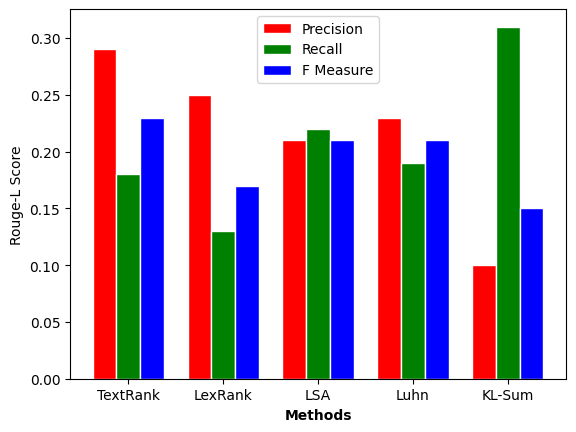

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
methods = ['TextRank', 'LexRank', 'LSA', 'Luhn', 'KL-Sum']
precision = [0.29,
0.25,
0.21,
0.23,
0.10
]
recall = [0.18,
0.13,
0.22,
0.19,
0.31

]
f_measure = [0.23,
0.17,
0.21,
0.21,
0.15

]

# Set the width of the bars
bar_width = 0.25

# Set the position of the bars on the x-axis
r1 = np.arange(len(precision))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar chart
plt.bar(r1, precision, color='red', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r2, recall, color='green', width=bar_width, edgecolor='white', label='Recall')
plt.bar(r3, f_measure, color='blue', width=bar_width, edgecolor='white', label='F Measure')

# Add xticks on the middle of the group bars
plt.xlabel('Methods', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(precision))], methods)

# Add y-label
plt.ylabel('Rouge-L Score')

# Add a legend
plt.legend()

# Show the plot
plt.show()